In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('realtor-data.zip.csv')

In [3]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [4]:
df.shape

(2226382, 12)

In [5]:
df.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [6]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [7]:
#df.dropna(axis=0, inplace=True)

In [8]:
df.drop(columns=['brokered_by','status','street','city', 'state', 'zip_code', 'prev_sold_date'],axis=0,inplace=True)

In [9]:
df

,price,bed,bath,acre_lot,house_size
0,105000.0,3.0,2.0,0.12,920.0
1,80000.0,4.0,2.0,0.08,1527.0
2,67000.0,2.0,1.0,0.15,748.0
3,145000.0,4.0,2.0,0.10,1800.0
4,65000.0,6.0,2.0,0.05,NaN
...,...,...,...,...,...
2226377,359900.0,4.0,2.0,0.33,3600.0
2226378,350000.0,3.0,2.0,0.10,1616.0
2226379,440000.0,6.0,3.0,0.50,3200.0
2226380,179900.0,2.0,1.0,0.09,933.0


In [10]:
df.isnull().sum()

price           1541
bed           481317
bath          511771
acre_lot      325589
house_size    568484
dtype: int64

In [11]:
df.dropna(axis=0, inplace=True)

In [12]:
df.isnull().sum()

price         0
bed           0
bath          0
acre_lot      0
house_size    0
dtype: int64

In [13]:
df.shape

(1360716, 5)

In [14]:
df.head()

,price,bed,bath,acre_lot,house_size
0,105000.0,3.0,2.0,0.12,920.0
1,80000.0,4.0,2.0,0.08,1527.0
2,67000.0,2.0,1.0,0.15,748.0
3,145000.0,4.0,2.0,0.10,1800.0
5,179000.0,4.0,3.0,0.46,2520.0


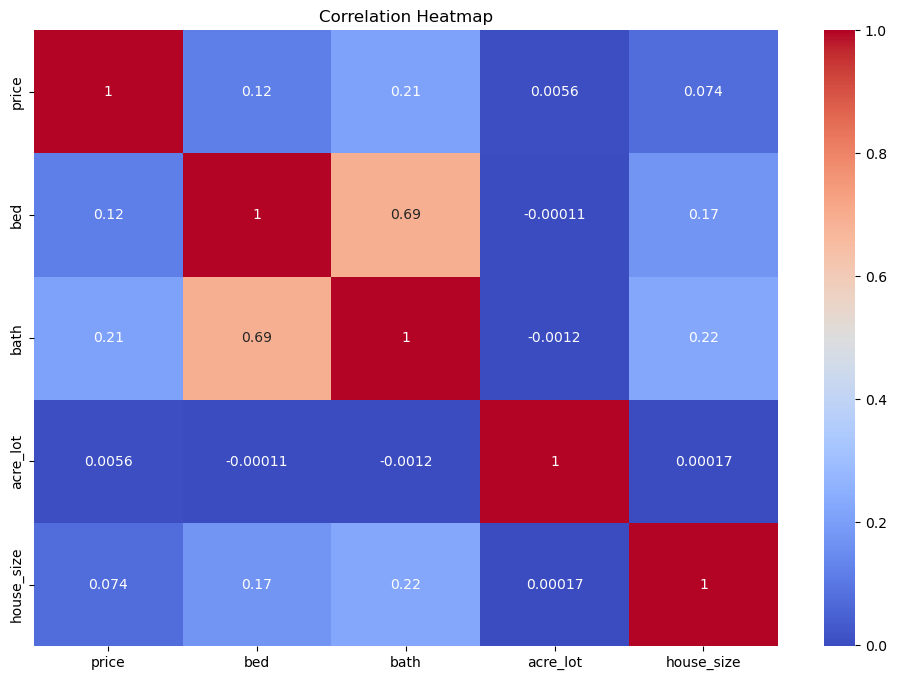

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [16]:
# Step 1: Create sample DataFrame

# df = pd.DataFrame(data)

# Step 2: Feature and Target split
X = df.drop('price', axis=1)
y = df['price']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 4: Standard Scaler (for numeric features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Step 5: Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
    #'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}

In [ ]:
# Step 6: Fit and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n{name} Results:")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):,.2f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

   # Actual price : $145,000.0	
    
    sample_data = pd.DataFrame([{
    'bed': 4.0,
    'bath': 2.0,
    'acre_lot': 0.10,
    'house_size': 1800.0
    }])
    print('--------------------------------------------------')
    # Predict using the trained Gradient Boosting model
    predicted_price = model.predict(sample_data)
    print(f"Predicted House Price: ${predicted_price[0]:,.2f}")



Linear Regression Results:
Mean Squared Error (MSE): 1,118,027,885,597.85
R² Score: 0.1704
--------------------------------------------------
Predicted House Price: $306,173.79
